<iframe width="100%" height="500" frameborder="0"
  src="https://observablehq.com/embed/@mandykeck/projektdokumentation_vis22?cell=*"></iframe>

Projektdokumentation Informationsvisualisierung (17\_VIS2I)
===========================================================

_Angabe TEAM 9 "HitOderNit?"_

1\. Datenanalyse und Exploration
--------------------------------

### Data Abstraction
<a style="color:gray" id=info>
Kurze Beschreibung des Datensatzes (Inhalt) und Herkunft der Daten (z.B. Link)<br>
Binden Sie den Datensatz in das Notebook ein und zeigen diesen in Form einer Übersicht!<br>
Wie groß ist der Datensatz in Bezug auf Zeilen (Anzahl der Elemente) und Spalten (uni-, bi-, multivariat)?<br>
Welchen Attributtyp haben die einzelnen Spalten (nominal, ordinal, quantitativ)?<br>
Welche Datenstruktur(en) stecken in dem Datensatz (z.B. hierarchisch, geografisch, temporal)<br>
</section>


Features von Tracks von Spotify Web-API (Lieder von 1960 – 2019) <br>
<b>Attribute & Attributtyp:</b>	
1. <b>Qualitativ<br>
	Nominale Daten: </b>
	- track: The Name of the track.
	- artist: The Name of the Artist.
	- uri: The resource identifier for the track.<br><b>
	Binary Daten: </b>
	- target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.
	- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
	<br>
	<br>

	
2. <b>Quantitative:</b>
	- danceability: . A value of 0.0 is least danceable and 1.0 is most danceable. 
	- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
	- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
	- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
	- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
	- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
	- instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
	- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
	- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
	- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
	- duration_ms:  The duration of the track in milliseconds.
	- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
	- chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
	- sections: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.
<br>
<br>
Source: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset <br><br>
Datensatz ist <b>multivariant</b><br><br>
<b>TO DO: Datenstruktur - kennt sich da wer aus?</b>





#### Datensatz Descriptive Statistik

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

url = 'https://github.com/aexsi/HCC_VIS_TEAM9/raw/main/Dataset_Total.csv'
df = pd.read_csv(url)


#some columns are named ubiquitous
df = df.rename(columns={"target": "is_hit", "mode": "is_major", "time_signature": "tact/4"})

desc = df.describe(include='all')
count = desc.iloc[1,1]
print( 'Total dataset rows: ', count )
print( 'Total dataset columns: ', len(desc.columns) )#, '(', desc.columns, ')' )
desc.iloc[4:,4:]



Total dataset rows:  35860
Total dataset columns:  20


,danceability,energy,key,loudness,is_major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,tact/4,chorus_hit,sections,is_hit
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [6]:
#Normierung
def minmax_norm(df_input):
    dat = df_input
    dat = dat - dat.min()
    dat = dat / dat.max()
    return dat

df_norm = df.iloc[:,2:]
df_norm['key'] = minmax_norm(df['key'])
df_norm['loudness'] = minmax_norm(df['loudness'])
df_norm['tempo'] = minmax_norm(df['tempo'])
df_norm['duration_ms'] = minmax_norm(df['duration_ms'])
df_norm['tact/4'] = minmax_norm(df['tact/4'])
df_norm['chorus_hit'] = minmax_norm(df['chorus_hit'])
df_norm['sections'] = minmax_norm(df['sections'])

##### Distribution overview
of normalized data ( [min..max] -> [0..1] )

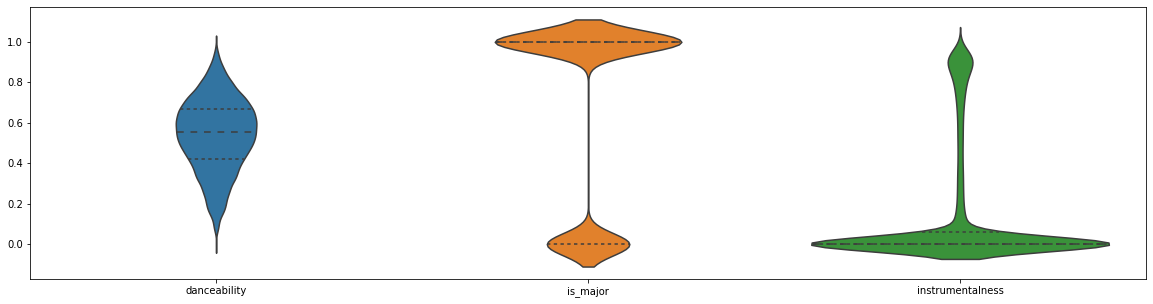

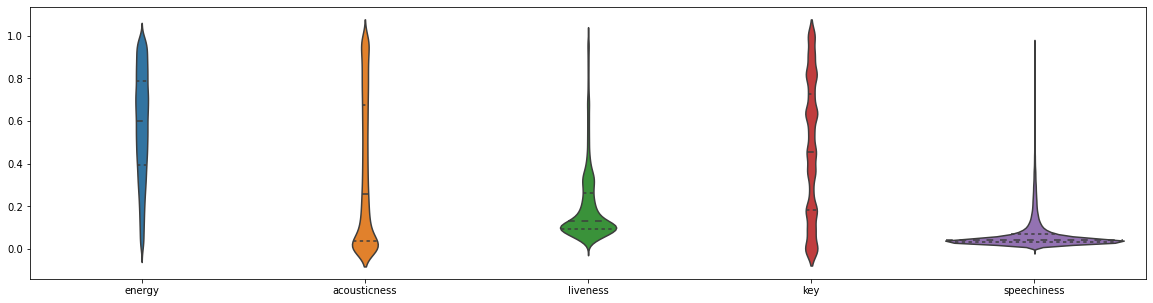

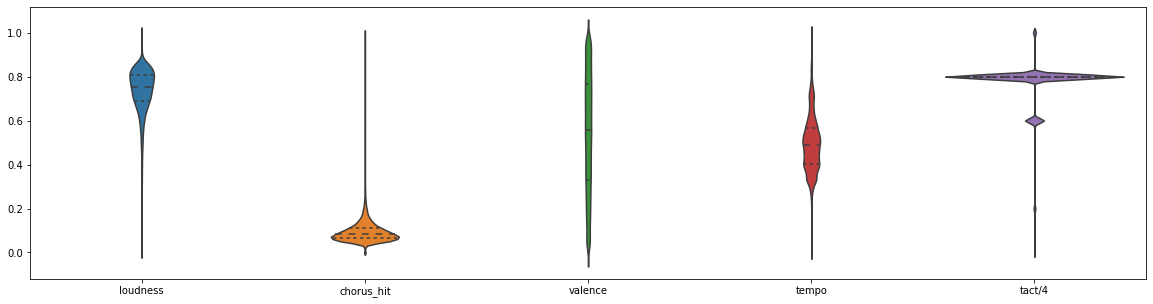

In [7]:
plt.figure(figsize=(20,5))
sb.violinplot( data = df_norm.iloc[:,[0,1,2,6,9]], inner='quart' )
plt.show()
plt.figure(figsize=(20,5))
sb.violinplot( data = df_norm.iloc[:,[3,8,10,4,7]], inner='quart' )
plt.show()
plt.figure(figsize=(20,5))
sb.violinplot( data = df_norm.iloc[:,[5,15,11,12,14]], inner='quart' )
plt.show()

The violin plots show the distribution of the values at first glance. What we can see from the data is, that _danceability_ is pretty much gaussian distributed.
Wheras _key_ and _energy_ seem uniform distributed - with _energy_ shifted slightly to one side. 
There are some items heavyly shifted to one side (_sections_, _time_signature_, _duration_, _instrumentalness_, _speechness_ and - not as pregnant - _liveness_).
The Values of _acousticness_ reensemble a bathtube curve. Which means the values are shifted to the ends.
A speciality are _target_ and _mode_ since these only allow values of 0 and 1 - they are binary.
<br>
There seems to be a narrow focus on _time signature_ of 4. Though a few songs also have a _time signature_ of 2.1 seconds. Songs with different _time signatures_ seem to be very rare. 

##### Correlation Matrix

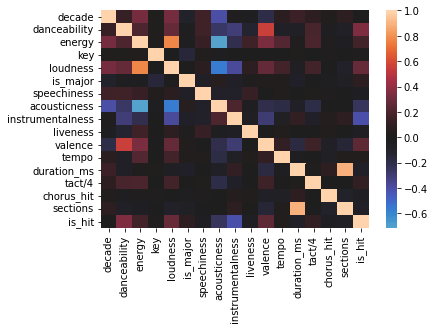

In [53]:
sb.heatmap( df.corr(), center=0 )


The correlation matrix shows higher correlated items with lighter color, yellowish color with positive correlation, blueish colors mean negative correlation. Black items are not correlated. 
<br>
So, if a song has high _acousicness_ it is less likely to have high _engergy_. Whereas songs with high _valence_ seem to also have more _danceability_. Also _duration_ and _sections_ are correlated. A long song also has more sections. The same is true for _loudness_ and _energy_: louder songs seem to have more energy. Whereas _acoustic_ songs are associated with low _energy_.
<br>
_chorus hit_ (first time when chorus is heard) doesn't correlate with any of the other items. Also the number of _sections_ is not much correlated with other items (exept for song _duration_).
<br>
Instrumental songs seem to tend to be slightly longer than average.

### Task Abstraction
<a style="color:gray">
Welche Fragen können mit dem gewählten Datensatz untersucht werden?<br>
Welche abstrakten Aufgaben stecken in den Fragen (z.B. Finden von Ausreißern, Vergleich von mehreren Werten)?<br>
Inwiefern ist es notwendig den Datensatz für die Beantwortung der Fragen anzupassen (z.B. Verknüpfungen, Filterung, Aggregation, Änderung des Detailgrads)? Bei großen Änderungen bitte den angepassten Datensatz in der Dokumentation einbinden/anzeigen.<br>
</a>

<b>Mögliche Fragestellungen:</b><br>
- Zeigen ob Rhythmus und Tanzbarkeit zusammenhängen 
    <br>Klickbar machen für den User um Live zu schauen ob 2 Eigenschaften in Zusammenhang stehen
- Veränderung über die Jahre zeigen: 
   <br> Ist die Tanzbarkeit über die Jahre höher / niedriger geworden?
    <br>Gibt es pro Jahrzent weniger / mehr Hits? 
- Ähnliche Eigenschaften von Flop und Hits zeigen
<br> Man kann klicken und entscheiden ob man Flops oder Hits sehen will
 -Klickbare Kategorien machen 
<br> Zeige alle tanzbaren hits /flops 
<br>Zeige alle Akustischen Hits .. <br><br>

<b>Abstrakte Aufgaben</b><br>
- Korrelation, Boxplot, finden von Ausreißern, T-test, Regression
<br>
<br>

<b>Anpassung vom dem Datensatzes:</b><br>
- Filterung, Agreggation


### Visuelle Exploration des Datensatzes

<a style="color:gray">
Explorieren Sie die Eigenschaften des Datensatzes mit mindestens zwei Visualisierungen pro Teammitglied! (z.B. Verteilungen oder Korrelationen untersuchen)<br>
Was haben Sie über die Eigenschaften ihres Datensatzes erfahren?<br>
<a>
<span style="color:red">_TODO until 30.04.2022 12:00_</style>


In [56]:
#Alex:
#Interactive Correlation Matrix
from IPython.display import display 
import ipywidgets as widgets
from ipywidgets import Layout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

dfc = df.drop(columns=['uri','track','artist'])


district = widgets.SelectMultiple(
    options = dfc.columns.tolist()[1:],
    rows = len(dfc.columns.tolist()[1:]),
    value = dfc.columns.tolist()[1:],
    description='Item',
    disabled=False,
    layout = Layout( display='flex')
)

yearitems = widgets.SelectMultiple(
    options = dfc.decade.unique().tolist(),
    rows = len(dfc.decade.unique().tolist()),
    value = dfc.decade.unique().tolist(),
    description='Decade',
    disabled=False,
    layout = Layout( display='flex')
)

def update(select, years):
    #Correlation Matrix
    pt = plt.figure(figsize=(8,6))
    
    if len(select) > 1:
        items = list(select)
    else:
        print("select more items")
        items = list(district.options)

    output = widgets.Output()

    
    dfe = dfc
    dfe = dfe[dfe.decade.isin(years)]
    cr = dfe[items].corr()
    mask = np.triu(np.ones_like(cr, dtype=bool))
    cr = dfe[items].corr().mask(mask)
    cr = cr.iloc[1:,:-1]
    print('Year(s):', years)
    #wgt = widgets.VBox([widgets.HBox([district,yearitems]),output])
    #display( wgt )
    with output:
        sb.heatmap( cr, center=0 )
    

wgts = widgets.interactive( update, select=district, years=yearitems )
display( wgts )

interactive(children=(SelectMultiple(description='Item', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …

In [ ]:
from vega_datasets import data
songs= data.

2\. Konzeption
----------



### Related Work

<a style="color:gray">
Welche Visualisierungstechniken haben Sie inspiriert (z.B. aus dem Internet, Vorlesungsfolien, Paper)?
<a>

### Sketching

<a style="color:gray">
Diskutieren Sie verschiedene Alternativen zur Lösung der Aufgaben und laden Sie Skizzen dazu in die Dokumentation (mindestens 3 Skizzen pro Teammitglied, die für eine oder Kombination der Teilaufgaben geeignet ist)!
</a>


### Konzept

<a style="color:gray">
Beschreiben Sie das finale Konzept und begründen Sie die Designentscheidungen!<br>
Welche Visualisierungstechniken haben Sie eingesetzt und warum?<br>
Welche Interaktionstechniken werden eingesetzt und warum?<br>
</a>
<span style="color:red">_TODO until 04.06.2022 12:00_</style>

3\. Prototyp
--------



### Umsetzung

<a style="color:gray">
Kurze Beschreibung des Prototypen und der Sichten (sofern möglich, den Link zum finalen Prototypen angeben oder Screenshot)<br>
Mit welchen Tool wurde der Prototyp umgesetzt?<br>
Inwieweit mussten Sie die Konzepte bei der Implementierung anpassen?<br>
</a>


### Diskussion & Insights

<a style="color:gray">
Diskutieren Sie die Ergebnisse und Erkenntnisse! Nutzen Sie wenn möglich Screenshots um die Findings zu dokumentieren!<br>
Konnten Sie die eingangs gestellten Fragen eindeutig beantworten? Wenn nein, warum?<br>
</a>
<span style="color:red">_TODO until 03.07.2022 23:55_</style>

4\. Imports and Code
----------------
<a style="color:gray">
_Sollten Sie zusätzliche Imports oder zusätzlichen Quellcode benötigen, der die Lesbarkeit der Dokumentation erschwert, dann können Sie diese hier unten einfügen_<br>
</a>


Credit: [Projektdokumentation Informationsvisualisierung (17\_VIS2I) by Mandy Keck](https://observablehq.com/@mandykeck/projektdokumentation_vis22)